### Reading dataset

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("titanic3_dataset.xlsx")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [37]:
# replacing values
df['sex'].replace(['female', 'male'],[0, 1], inplace=True)
df['embarked'].replace(['C', 'Q', 'S'],[1, 2, 3], inplace=True)
df['boat'].replace(['A', 'B', 'C', 'D'],[1, 2, 3, 4], inplace=True)

In [35]:
# Function to process the column
def process_boat(value):
    if isinstance(value, str):  # Check if the value is a string
        # Split the string, convert to integers, and return their sum
        return sum(map(int, value.split()))
    return value  # If it's not a string, keep it as is

# Apply the function to the 'boat' column
df['boat'] = df['boat'].apply(process_boat)

ValueError: invalid literal for int() with base 10: 'B'

In [25]:
# replacing na values in boat & body with 0
df["boat"].fillna(0, inplace = True)
df["body"].fillna(0, inplace = True)

C:\Users\karan\AppData\Local\Temp\ipykernel_6308\2797552908.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["body"].fillna(0, inplace = True)


In [26]:
df.describe()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,body
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1307.000000,1309.000000
mean,2.294882,0.381971,0.644003,29.881135,0.498854,0.385027,33.295479,2.492731,14.864782
std,0.837836,0.486055,0.478997,14.413500,1.041658,0.865560,51.758668,0.814626,55.197471
min,1.000000,0.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,21.000000,0.000000,0.000000,7.895800,2.000000,0.000000
50%,3.000000,0.000000,1.000000,28.000000,0.000000,0.000000,14.454200,3.000000,0.000000
75%,3.000000,1.000000,1.000000,39.000000,1.000000,0.000000,31.275000,3.000000,0.000000
max,3.000000,1.000000,1.000000,80.000000,8.000000,9.000000,512.329200,3.000000,328.000000


In [28]:
# df = df.drop(columns="name")
# df = df.drop(columns="home.dest")
# df = df.drop(columns="cabin")
# df = df.drop(columns="ticket")
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")

ValueError: could not convert string to float: '5 9'

<Figure size 1000x600 with 0 Axes>

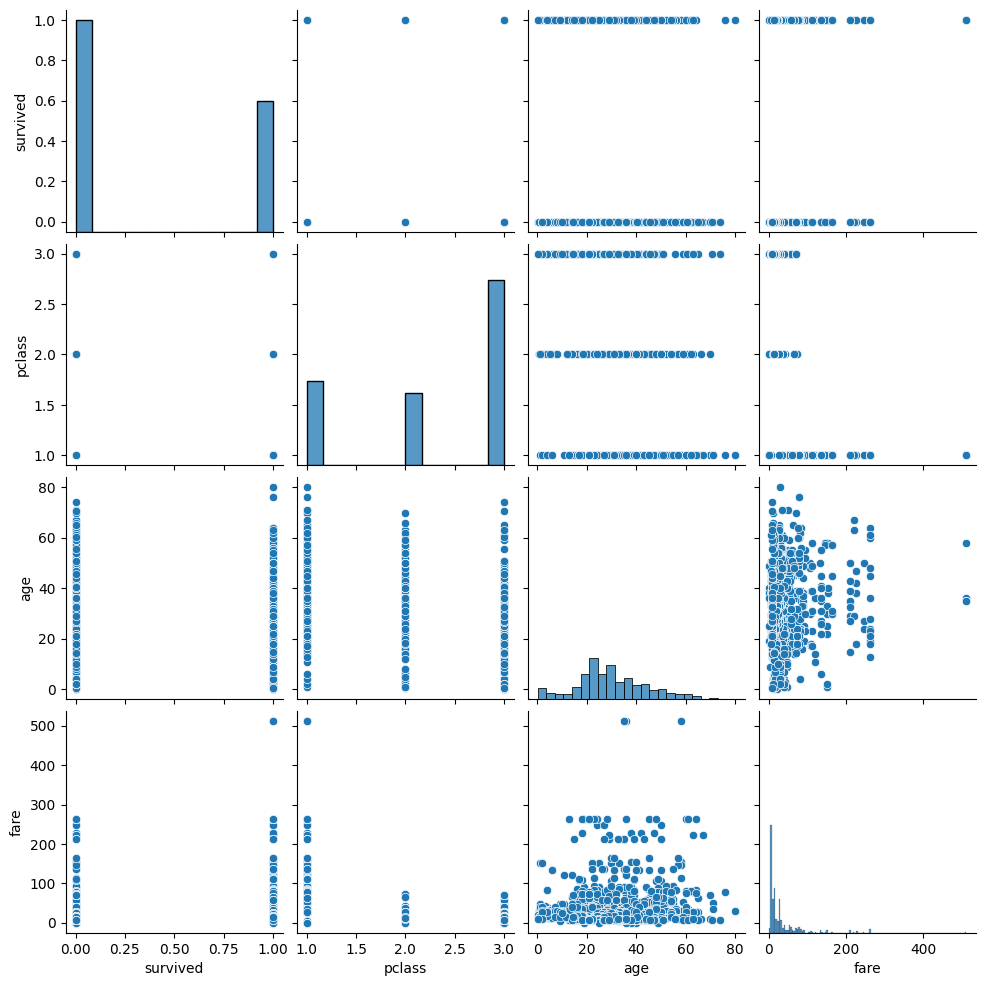

In [30]:
sns.pairplot(df[['survived', 'pclass', 'age', 'fare']])

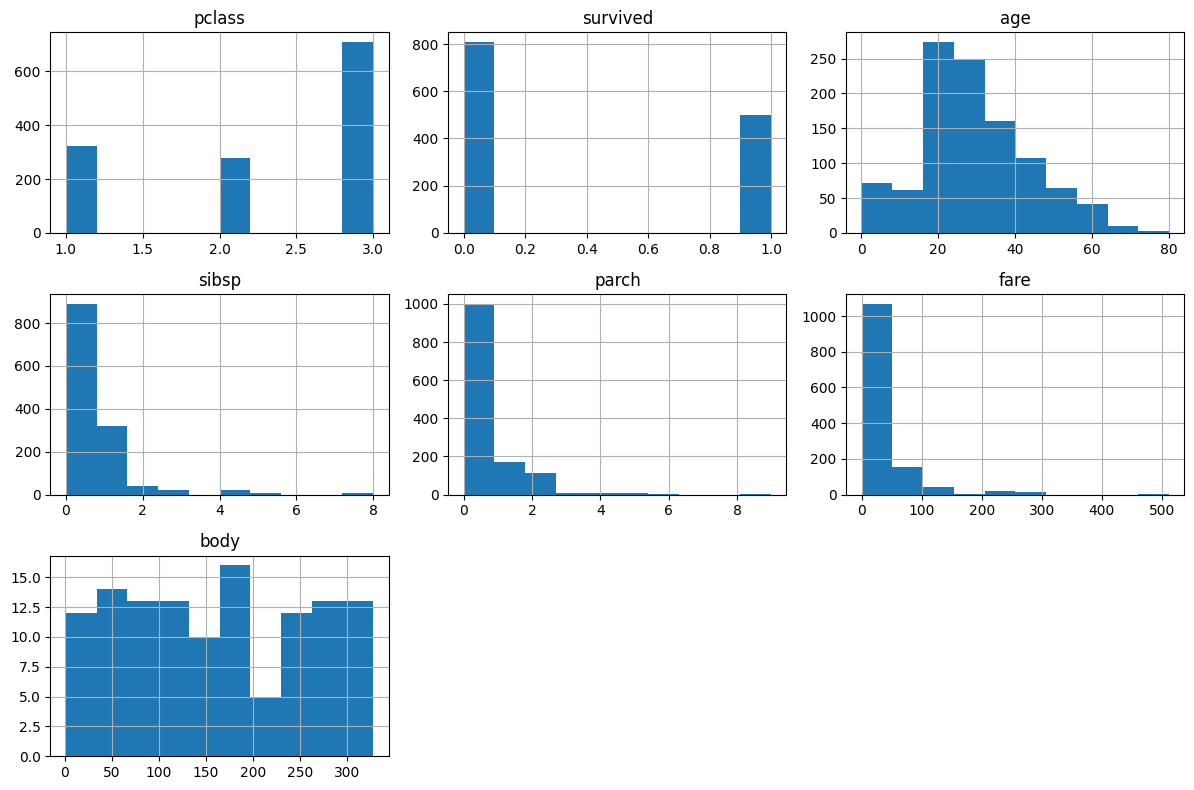

In [25]:
df.hist(figsize=(12, 8))
plt.tight_layout()


<Axes: xlabel='survived', ylabel='age'>

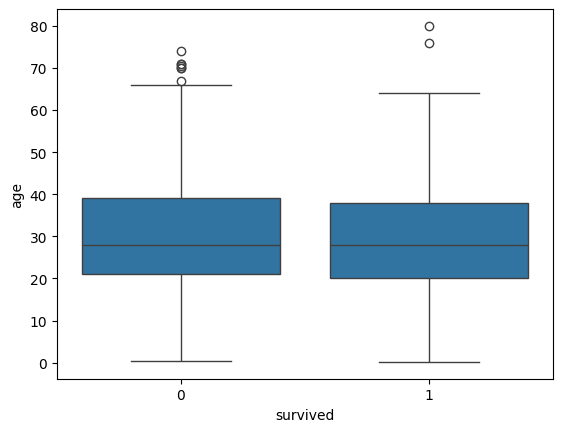

In [31]:
sns.boxplot(x='survived', y='age', data=df)

<Axes: xlabel='fare', ylabel='age'>

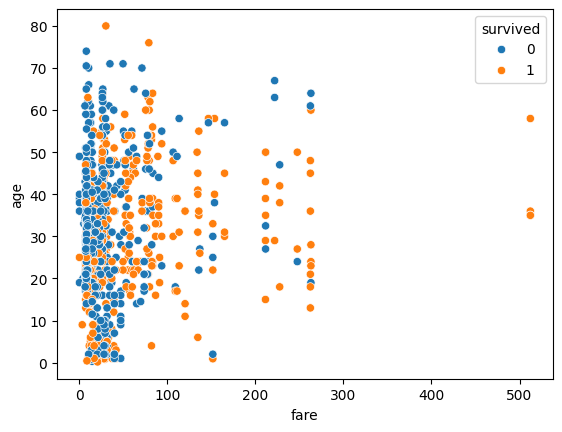

In [37]:
sns.scatterplot(x='fare', y='age', hue='survived', data=df)
